In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import exp, pi # complex math

### DFT:

[Erklärung in Python Programming And Numerical Methods: A Guide For Engineers And Scientists](https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.02-Discrete-Fourier-Transform.html)

Oder im Buch: [The Scientist and Engineer's Guide to
Digital Signal Processing](https://www.dspguide.com/)

$$X_k = \sum_{n=0}^{N-1} x_n \mathrm{e}^{-\frac{2\pi i}{N} kn}$$

In [2]:
def dft(x):
    """"Computes the classical DFT of the given vector x"""
    N = len(x)
    result = []
    for k in range(N):
        r = 0
        for n in range(N):
            t = -2j*pi*k*n/N
            r += x[n] * exp(t)
        result.append(r)
    return result

### FFT:
"Divide and Conquer" Algorithmus, der die DFT durch Aufteilung auf gerade ($n = 2m$) und ungerade ($n = 2m + 1$) Indizes berechnet:

$$X_k = \sum_{m=0}^{N/2-1} x_{2m} \, \mathrm{e}^{-\frac{2\pi i}{N} (2m)k} + \sum_{m=0}^{N/2-1} x_{2m+1} \, \mathrm{e}^{-\frac{2\pi i}{N} (2m+1)k}$$
$$X_k = \sum_{m=0}^{N/2-1} x_{2m} \, \mathrm{e}^{-\frac{2\pi i}{N/2} mk} + \mathrm{e}^{-\frac{2\pi i}{N} k} \sum_{m=0}^{N/2-1} x_{2m+1} \, \mathrm{e}^{-\frac{2\pi i}{N/2} mk}$$
$$X_k = E_k + \mathrm{e}^{-\frac{2\pi i}{N} k} O_k \quad \text{ für } k = 0 \dots \frac{N}{2} - 1$$

So nur gültig für $N$ als Zweierpotenz

In [3]:
def fft(x):
    N = len(x)

    if N <= 1:
        return x

    even = fft(x[0::2]) #take even samples
    odd =  fft(x[1::2]) #take odd samples

    length = N//2
    result = []
    T = np.empty(length, dtype=complex)

    for k in range(length):
        T[k] = exp(-2j*pi*k/N) * odd[k]

    #append even parts
    for k in range(length):
        result.append(even[k] + T[k])

    #append odd parts
    for k in range(length):
        result.append(even[k] - T[k])

    return result

# More compact implementation
def fft2(x):
    N = len(x)
    if N <= 1:
        return x

    even = fft2(x[0::2])
    odd =  fft2(x[1::2])

    T= [exp(-2j*pi*k/N)*odd[k] for k in range(N//2)]
    return [even[k] + T[k] for k in range(N//2)] + [even[k] - T[k] for k in range(N//2)]

In [4]:
def single_sided_spectrum(X, ts):
    """"Returns the single sided spectrum and the frequency vector --> similar to np.fft.rfft(x)"""
    N = len(X)
    f = (1/ts) * np.arange(0, N//2) / N
    P2 = np.asarray([np.abs(x/N) for x in X])
    P1 = P2[0:N//2]
    P1[1:-1] *= 2
    return P1, f

Number of samples:  4096


Text(0.5, 1.0, '10Hz sine wave sampled at 4096Hz')

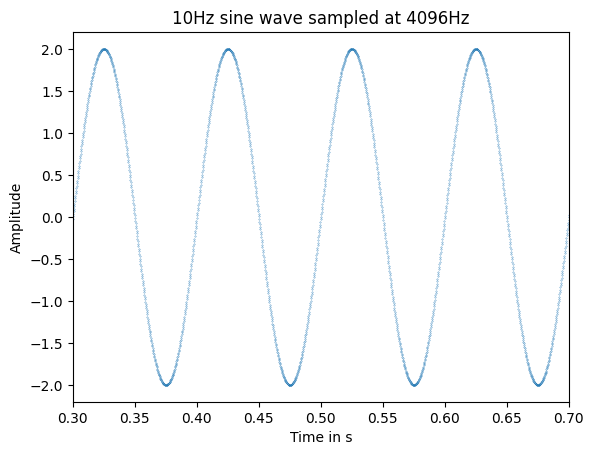

In [5]:
ts = 1/4096 #sampling time for 4096Hz
f = 10 #10Hz

t_end = (2**np.ceil(np.log2(1/ts))) * ts # round up to next power of 2
t = np.arange(0, t_end, ts) # 1 second

# check if power of 2
print("Number of samples: ", len(t))
assert np.log2(len(t)) % 1 == 0, "Number of samples must be a power of 2 to work with this particular FFT implementation"

x = 2*np.sin(2*np.pi*f*t)

plt.plot(t, x, marker='.', markersize=0.5, linestyle='None')
plt.xlim(0.5-2/f, 0.5+2/f)
plt.xlabel('Time in s')
plt.ylabel('Amplitude')
plt.title('10Hz sine wave sampled at 4096Hz')

Text(0.5, 1.0, 'FFT - Amplitude Spectrum')

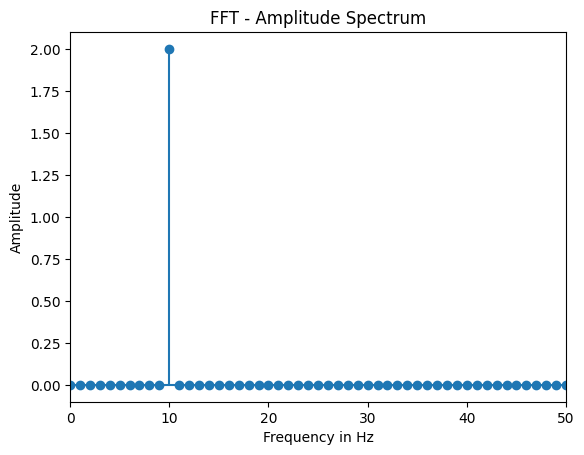

In [6]:
X_fft = fft(x)
P1, f = single_sided_spectrum(X_fft, ts)
plt.stem(f, P1, basefmt="")
plt.xlim(0, 50)

plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.title('FFT - Amplitude Spectrum')

In [7]:
print(f"Highest frequency component: {f[np.argmax(P1)]} Hz is with {np.max(P1)}")

Highest frequency component: 10.0 Hz is with 2.0


Text(0.5, 1.0, 'DFT - Amplitude Spectrum')

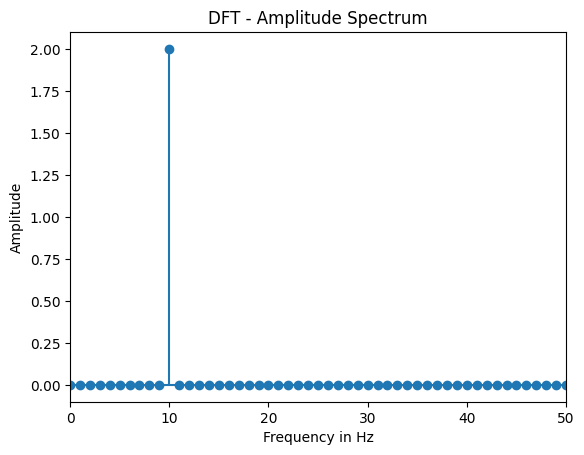

In [8]:
X_dft = dft(x)
P1, f = single_sided_spectrum(X_dft, ts)
plt.stem(f, P1, basefmt="")
plt.xlim(0, 50)

plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.title('DFT - Amplitude Spectrum')

Text(0.5, 1.0, 'numpy FFT - Amplitude Spectrum')

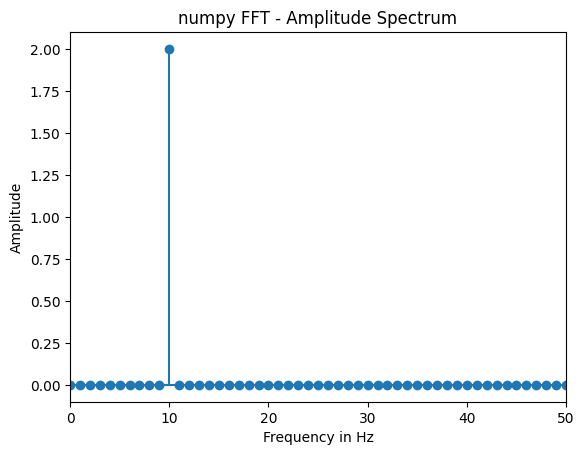

In [9]:
X_numpy = np.fft.fft(x)
P1, f = single_sided_spectrum(X_numpy, ts)
plt.stem(f, P1, basefmt="")
plt.xlim(0, 50)

plt.xlabel('Frequency in Hz')
plt.ylabel('Amplitude')
plt.title('numpy FFT - Amplitude Spectrum')

Text(0.5, 1.0, 'Execution time of FFT and DFT')

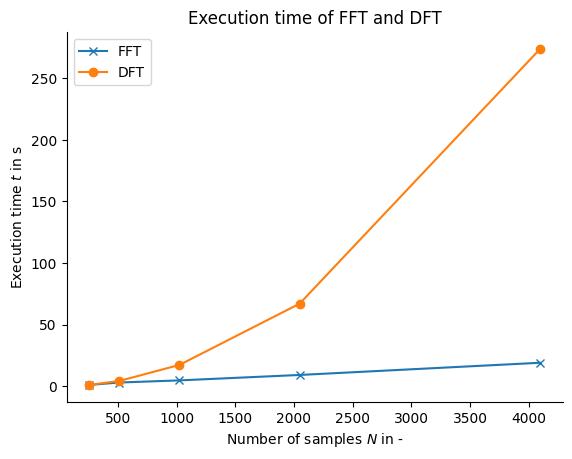

In [10]:
n_samples = np.array([256, 512, 1024, 2048, 4096])
fft_times = np.array([0.0022001266479492188, 0.0065001964569091795, 0.010299992561340333, 0.020000171661376954, 0.0417996883392334])
dft_times = np.array([0.25258400440216067, 1.063625741004944, 4.348405504226685, 16.916235828399657, 69.15368843078613])

fft_times /= fft_times[0]
dft_times /= dft_times[0]

fig, ax = plt.subplots()
ax.plot(n_samples, fft_times, marker="x", label="FFT")
ax.plot(n_samples, dft_times, marker="o", label="DFT")
ax.spines[['right', 'top']].set_visible(False)
ax.legend()
ax.set_xlabel("Number of samples $N$ in -")
ax.set_ylabel("Execution time $t$ in s")
ax.set_title("Execution time of FFT and DFT")

### Tatsächliche Zeitkomplexität
- DFT: $\mathcal{O}(n^2)$
- FFT: $\mathcal{O}(n \log n)$

Text(0.5, 1.0, 'Computational complexity $n^2$ vs $n$ log($n$)')

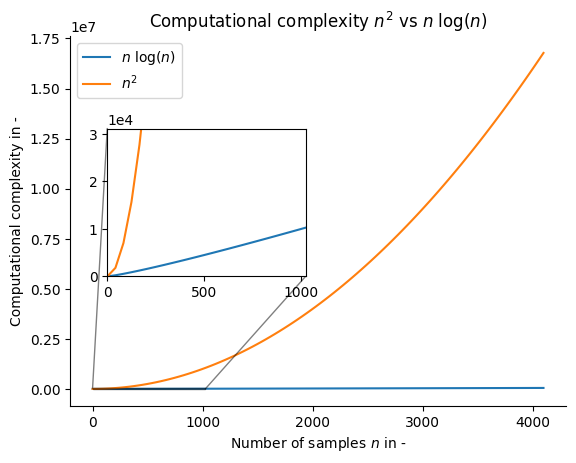

In [11]:
n_samples_smooth = np.linspace(1, 4096, 100)
n_squared = n_samples_smooth**2
n_logn = n_samples_smooth * np.log2(n_samples_smooth)

fig, ax = plt.subplots()
ax.plot(n_samples_smooth, n_logn, label="$n$ log($n$)")
ax.plot(n_samples_smooth, n_squared, label="$n^2$")
ax.spines[['right', 'top']].set_visible(False)
axin = ax.inset_axes([0.075, 0.35, 0.4, 0.4])
axin.plot(n_samples_smooth, n_logn, label="$n$ log($n$)")
axin.plot(n_samples_smooth, n_squared, label="$n^2$")

axin.set_xlim(0, 1024)
idx = np.abs(n_samples_smooth - 1024).argmin() # find index of element closest to 1024
axin.set_ylim(0, n_logn[idx] * 3)

axin.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
ax.indicate_inset_zoom(axin, edgecolor="black")

ax.legend()
ax.set_xlabel("Number of samples $n$ in -")
ax.set_ylabel("Computational complexity in -")
ax.set_title("Computational complexity $n^2$ vs $n$ log($n$)")